> We are going to use the `USA_Housing` or `sample_data/california_housing...` dataset. Since house price is a continues variable, this is a regression problem. The data contains the following columns:

> * '`Avg. Area Income`': Avg. Income of residents of the city house is located in.
> * '`Avg. Area House Age`': Avg Age of Houses in same city
> * '`Avg. Area Number of Rooms`': Avg Number of Rooms for Houses in same city
> * '`Avg. Area Number of Bedrooms`': Avg Number of Bedrooms for Houses in same city
> * '`Area Population`': Population of city house is located in
> * '`Price`': Price that the house sold at
> * '`Address`': Address for the house

Let's try and create a model that can predict the price of a house based on the variables and historical data


# 1. Import standard libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [2]:
df_train = pd.read_csv("Data/california_housing_train.csv")
df_test = pd.read_csv("Data/california_housing_test.csv")

## 2. Explore the data a bit.
### List:

1.   First few rows
2.   Basic statistic: pandas summary statistics (describe())
3.   .info()
4.   Column names

Questions:

1. What is the dependent variable (column name)?
* **The dependent variable is "median_house_value". It holds the house price that we want to predict**
2. What are the independent variables?
* **All other variables can be considered independent variables: 'longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', and 'median_income'**
3. Should we normalize the data?
* **yes because large outliers would otherwise dominate the prediction. also it solves the issue of scales. Different scales make it difficult to interpret the coefficients and larger scales would domintate the predicition contribution similarly to the outliers.**
4. What are the column data-types?
* **numeric data (float64)**

In [3]:
# 1. First few rows of training data
df_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [4]:
# First few rows of test data
df_test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


In [5]:
# 2.Basic statistics of training data
df_train.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
# 3. Info of training data
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [7]:
# Info of test data
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           3000 non-null   float64
 1   latitude            3000 non-null   float64
 2   housing_median_age  3000 non-null   float64
 3   total_rooms         3000 non-null   float64
 4   total_bedrooms      3000 non-null   float64
 5   population          3000 non-null   float64
 6   households          3000 non-null   float64
 7   median_income       3000 non-null   float64
 8   median_house_value  3000 non-null   float64
dtypes: float64(9)
memory usage: 211.1 KB


In [8]:
# 4. Column names
df_train.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

# 3. Exploratory Data Analysis (EDA)

Create some simple plots to check out the data!

1.   Plot the pairwise scatter-plot between each column
2.   Plot the distribution of the values of the dependent variable
3.   Plot the pairwise correlation heatmap of each column.

Answer questions:

1.  What are the assumptions of the linear regression model?
* **Linearity: Linear relationship between dependent variable & independent variables**
* **Homoscedasticity, which means that the variance of the residuals is the same for all x values**
* **Normality: for all values of x, y needs to be normally distributed**
* **Independence: independent observations**
2.  Can we accept the basic assumptions of the linear regression model?
* **Linearity: The heatmap shows for all variables a non-zero correlation. However, looking at the scatterplot not all relations seem to be linear which has to be considered in preparing the data. Between median income / total bedrooms and median house value appears to be a slight linear relation.**
* **Homoscedasticity: looking at the distribution of values between the dependent variable and median income it seems that the residuals are approximately normally distributed. This can be seen as there is a cloud: when plotting a line through the cloud the distances of the points (real values) to the points on the line (predicted values) do not seem to increase or change.**
3.  Judging by the scatter-plots, do you see any patterns in the data?
* **It appears that there are some linear relaionships between total bedrooms and total rooms, population and total rooms, households and total rooms, population and total bedrooms, housholds and total bedrooms and households and population.**
4.  Judging by the correlation heat-map, is there correlation between the dependent variable and the independent variables?
* **Yes, it shows for all variables a non-zero correlation.**
* **High correlations exist between median_house_value and median_income and households. The lowest correlation of median_house_value to another variable is with housing_median_age.**
5.  Are there correlations among independent variables?
* **Yes, many variables are correlated. For instance, the described relations in 3. are also visible in the heatmap. Another example is that the median housing age is correlated with various other variables.**

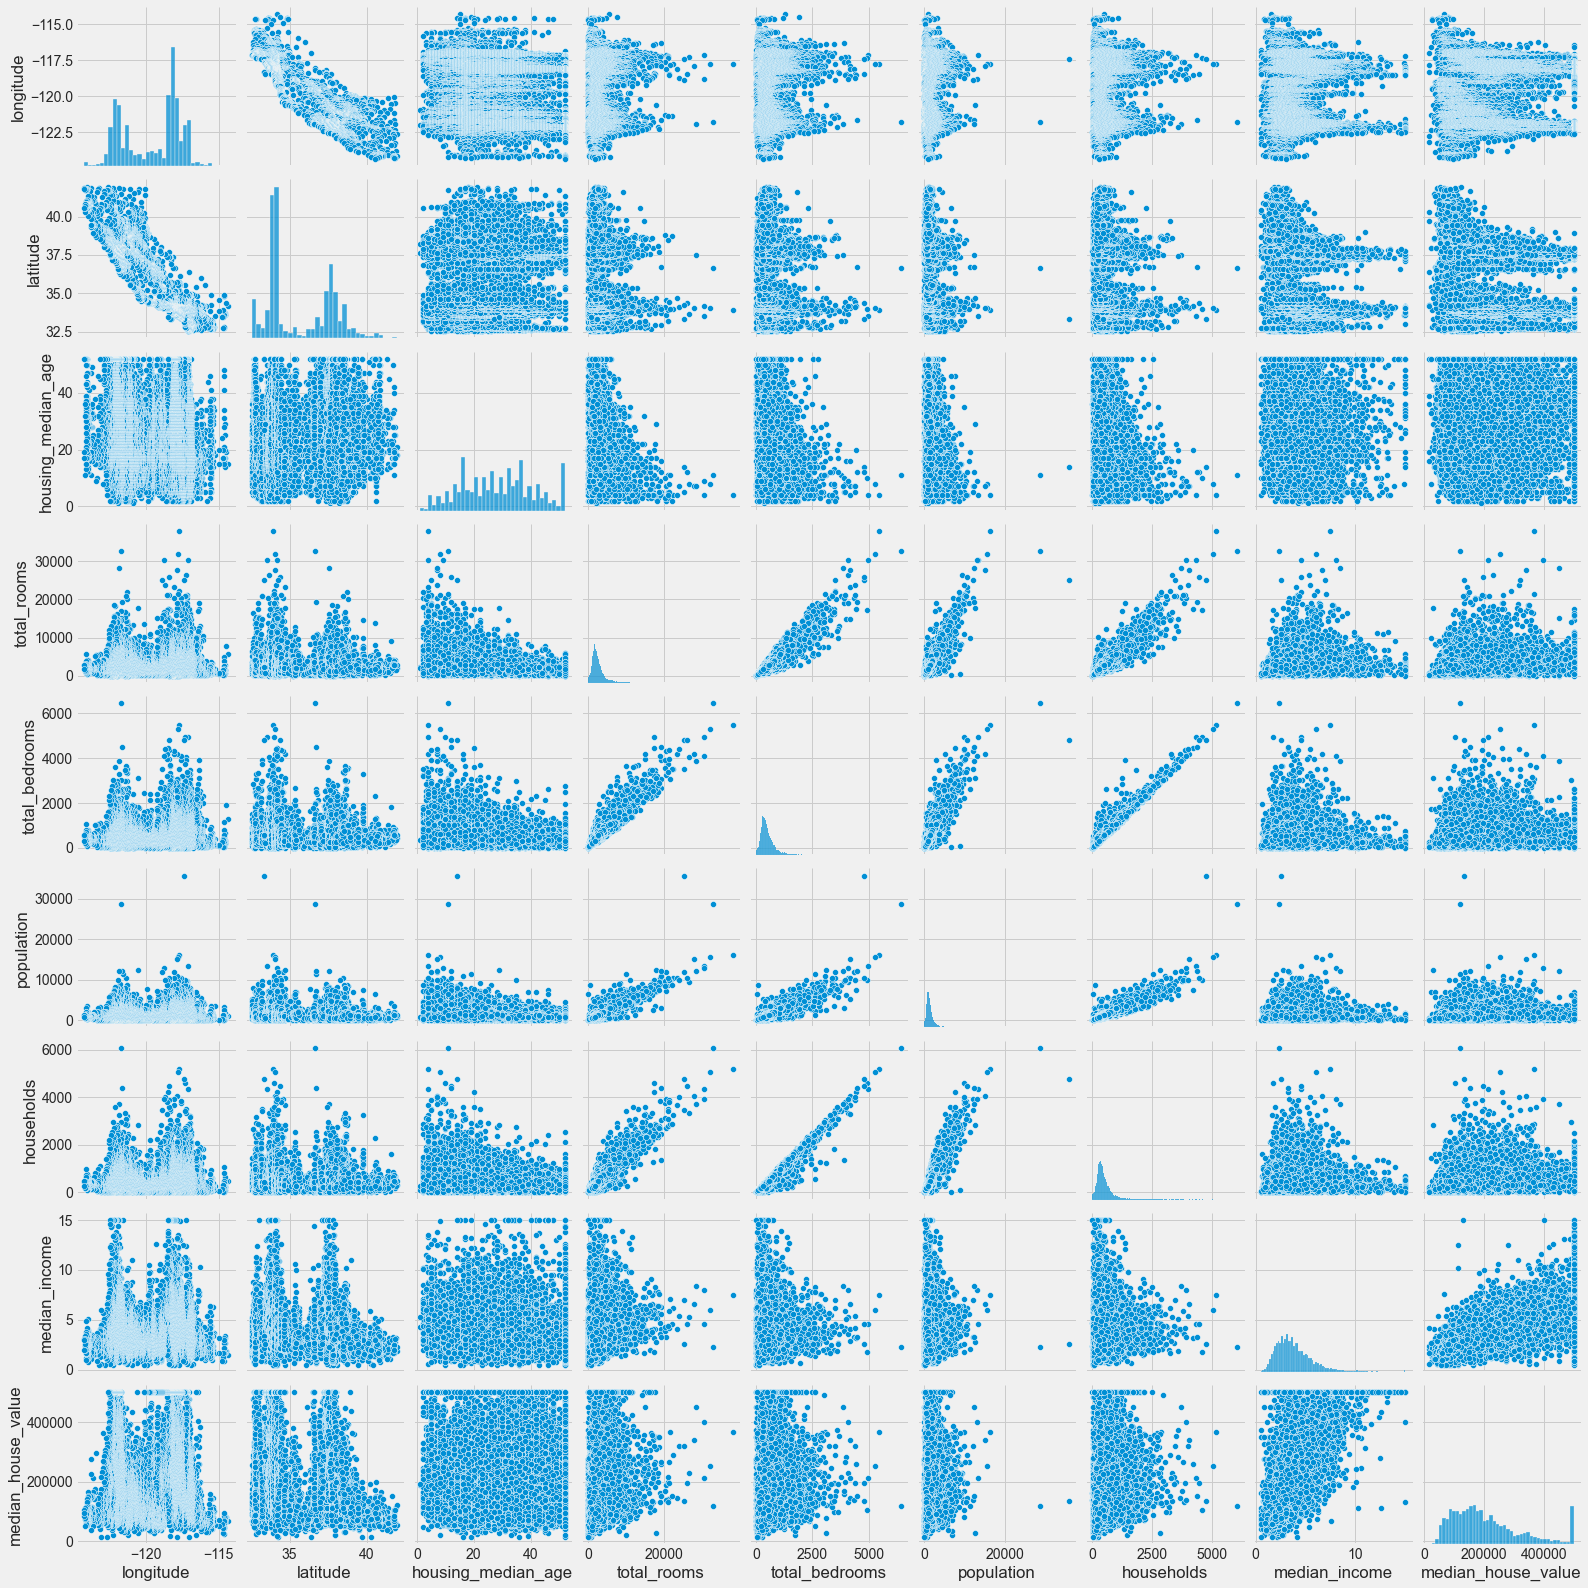

In [9]:
# 1.Pairplot
sns.pairplot(df_train)

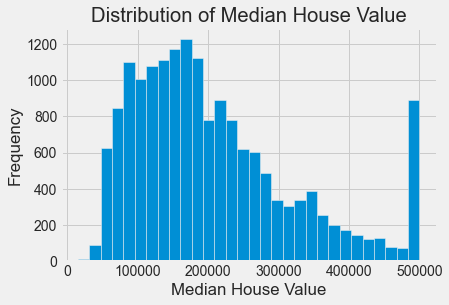

In [10]:
# 2. Histogram to visualize the distribution
plt.hist(df_train["median_house_value"], bins = 30)

plt.xlabel("Median House Value")
plt.ylabel("Frequency")
plt.title("Distribution of Median House Value")

plt.show()

<AxesSubplot:>

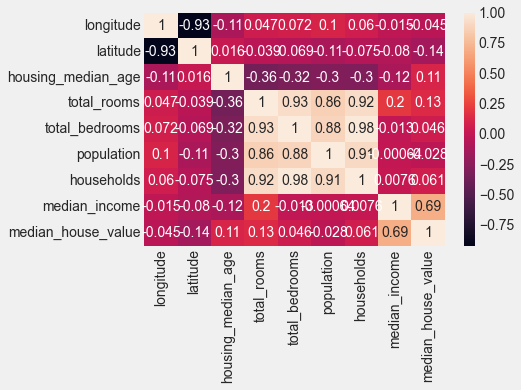

In [11]:
# 3.Correlation visualization
correlation_matrix = df_train.corr()
sns.heatmap(correlation_matrix,  annot=True)

# 4. Training a Linear Regression Model
## X and y arrays

Tasks:

1. Split the data-frame into an `X` array and and `y` array
2. Are all columns useful for linear regression? Is there some that should be excluded? Exclude the useless ones
* **considering the aimed prediction of housing prices, the coordintaes (adress) might not make sense to be include. Further, it could be argued that Area Population might not be a relavant factor (as for instance really low population might indicate a rich and expensive area (outside city for instance) or a not expensive area (in a village somewhere in the middle of nowhere). Similarly, "housholds" would not be a variable included in the regression.**

In [12]:
# 2. Excluding not useful columns from dataframe
df_train = df_train.drop(columns = ['longitude', 'latitude', 'households', 'population'])
df_test = df_test.drop(columns = ['longitude', 'latitude', 'households', 'population'])
df_train.head()

,housing_median_age,total_rooms,total_bedrooms,median_income,median_house_value
0,15.0,5612.0,1283.0,1.4936,66900.0
1,19.0,7650.0,1901.0,1.8200,80100.0
2,17.0,720.0,174.0,1.6509,85700.0
3,14.0,1501.0,337.0,3.1917,73400.0
4,20.0,1454.0,326.0,1.9250,65500.0


In [13]:
# 1. Create arrays
y_train_array = df_train['median_house_value'].values
X_train_array = df_train.drop("median_house_value", axis = 1).values
y_test_array = df_test['median_house_value'].values
X_test_array = df_test.drop("median_house_value", axis = 1).values

In [14]:
# Create dataframes which will be used for future tasks
df_y_train = df_train[['median_house_value']]
df_X_train = df_train.drop("median_house_value", axis = 1)
df_y_test = df_test[['median_house_value']]
df_X_test = df_test.drop("median_house_value", axis = 1)

## 5. Train / Test Split

We need to split the data into the train and test subsets.

In [32]:
# Split the data here: dont need to do that because it is already split data to import

In [15]:
from sklearn import metrics

def print_evaluate(true, predicted):
    mae, mse, rmse, r2_square = evaluate(true, predicted) # added to print metrics from evaluate function
    #Print mean absolute error
    print('MAE:', mae)
    #Print mean square error
    print('MSE:', mse)
    # Print root square error
    print('RMSE:', rmse)
    # Print R2 score
    print('R2 Square', r2_square)
    print('__________________________________')

def evaluate(true, predicted):
    # Calculate mean absolute error
    mae = metrics.mean_absolute_error(true, predicted)
    # Calculate mean square error
    mse = metrics.mean_squared_error(true, predicted)
    # Calculate root mean square error
    rmse = np.sqrt(mse)
    # Calculate R2 score
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

# 6. Preparing Data For Linear Regression
> Linear regression is been studied at great length, and there is a lot of literature on how your data must be structured to make best use of the model.

> As such, there is a lot of sophistication when talking about these requirements and expectations. In practice, you can uses these rules more as rules of thumb when using Ordinary Least Squares Regression, the most common implementation of linear regression.

> Try different preparations of your data using these heuristics and see what works best for your problem.

Assess the following steps using the plots you made earlier and answer whether the assumtions and conditions are being met:

- **Linear Assumption.** Linear regression assumes that the relationship between your input and output is linear. You may need to transform data to make the relationship linear (e.g. log transform for an exponential relationship).
**Answer: It does not appear as there is a transformation that could be useful. Looking at the heatmap there is no exponential relationship between the dependent and an independent variable.**

- **Rescale Inputs:** Linear regression will often make more reliable predictions if you rescale input variables using standardization or normalization.

**Answer: The data holding the independent variables (X) will be normalized using StandardScalar()**

- **Remove Collinearity.** Linear regression will over-fit your data when you have highly correlated input variables. Consider calculating pairwise correlations for your input data and removing the most correlated.

**Answer:**
* **Considering the correlation between the independent variables, most values are between total_rooms and total_bedrooms (0.928). This makes sense because both variables describe the number of rooms and total_bedrooms is a subset of total_rooms. It is likely that a house with more rooms has also more bedrooms.**
* **Also housing_median_age is moderately correlated to total_rooms and total_bedrooms.**
* **Consequently, it is decided to remove the variable total_bedrooms as it has the strongest correlation to other variables**

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Rescaling Inputs: Normalizing X_train
scaler = StandardScaler() # Initalizing scaler
scaler.fit(df_X_train) # Fit training data
df_X_train_norm = scaler.transform(df_X_train) # Transform training data and save
df_X_train_norm = pd.DataFrame(df_X_train_norm, columns=df_X_train.columns) # change to df again
df_X_test_norm = scaler.transform(df_X_test) # Transform test data and save (based on fit of training data)
df_X_test_norm = pd.DataFrame(df_X_test_norm, columns=df_X_test.columns) # change to df again

In [34]:
# Analyzing Collinearity
df_X_train_norm.corr()

,housing_median_age,total_rooms,total_bedrooms,median_income
housing_median_age,1.000000,-0.360984,-0.320434,-0.115932
total_rooms,-0.360984,1.000000,0.928403,0.195383
total_bedrooms,-0.320434,0.928403,1.000000,-0.013495
median_income,-0.115932,0.195383,-0.013495,1.000000


In [35]:
# Removing Collinearity
df_X_train_norm = df_X_train_norm.drop(df_X_train_norm.columns[2], axis=1)
df_X_test_norm = df_X_test_norm.drop(df_X_test_norm.columns[2], axis=1)
df_X_train_norm

,housing_median_age,total_rooms,median_income
0,-1.079671,1.361695,-1.252543
1,-0.761872,2.296608,-1.081483
2,-0.920772,-0.882462,-1.170105
3,-1.159121,-0.524186,-0.362600
4,-0.682422,-0.545747,-1.026454
...,...,...,...
16995,1.859971,-0.195728,-0.799999
16996,0.588774,-0.135174,-0.715727
16997,-0.920772,0.015292,-0.446663
16998,-0.761872,0.012999,-0.997787


In [36]:
df_X_test_norm

,housing_median_age,total_rooms,median_income
0,-0.126274,0.569451,1.428081
1,1.144923,-0.520057,-0.149142
2,-0.126274,0.433663,1.000902
3,-0.046824,-1.182020,1.180400
4,-0.761872,-0.643459,-0.495822
...,...,...,...
2995,-0.444073,-0.547582,-1.417419
2996,-0.126274,1.198842,-0.258361
2997,-1.476920,-0.774200,-0.835427
2998,0.906573,-1.168716,-0.321146


# 7. Linear Regression

Take the most correlated dependent/independent pair and calculate the `beta` parameters for Simple linear regression.

Use `skitlearn` to fit the linear model and see if your calculation corresponds to what the library did.
* **The results of the betas are the same.**

Use `skitlearn` to fit the linear model dependent on all independent variables (normalize inputs).

In [37]:
# Answer: the most correlated pair looking at the heatmap is the  median income and target value
df_X_train_income = df_X_train_norm.copy()
df_X_train_income = df_X_train_income[["median_income"]]

print(df_X_train_income)
print(df_X_train_norm)
print(df_y_train)

       median_income
0          -1.252543
1          -1.081483
2          -1.170105
3          -0.362600
4          -1.026454
...              ...
16995      -0.799999
16996      -0.715727
16997      -0.446663
16998      -0.997787
16999      -0.455363

[17000 rows x 1 columns]
       housing_median_age  total_rooms  median_income
0               -1.079671     1.361695      -1.252543
1               -0.761872     2.296608      -1.081483
2               -0.920772    -0.882462      -1.170105
3               -1.159121    -0.524186      -0.362600
4               -0.682422    -0.545747      -1.026454
...                   ...          ...            ...
16995            1.859971    -0.195728      -0.799999
16996            0.588774    -0.135174      -0.715727
16997           -0.920772     0.015292      -0.446663
16998           -0.761872     0.012999      -0.997787
16999            1.859971    -0.377848      -0.455363

[17000 rows x 3 columns]
       median_house_value
0                 6690

In [38]:
X_train_income = df_X_train_income["median_income"].values
y_train_income = df_y_train.copy()["median_house_value"].values
mean_X_train_income = np.mean(X_train_income)
mean_y_train = np.mean(y_train_income)

numerator = np.sum((X_train_income - mean_X_train_income) * (y_train_income - mean_y_train))
denominator = np.sum((X_train_income - mean_X_train_income) ** 2)

beta_1 = numerator / denominator
beta_0 = mean_y_train - beta_1 * mean_X_train_income

print("Beta 0:", beta_0)
print("Beta 1:", beta_1)

Beta 0: 207300.9123529412
Beta 1: 80243.39689129735


In [39]:
from sklearn.linear_model import LinearRegression
# Create a LinearRegression object
model = LinearRegression()

# Fit the model using X_train_norm and y_train
model.fit(df_X_train_norm[["median_income"]], df_y_train)

beta0 = model.intercept_
beta1 =  model.coef_[0]
# Print the intercept and coefficient
print("Intercept (Beta 0):", beta0)
print("Coefficient (Beta 1):", beta1)

Intercept (Beta 0): [207300.91235294]
Coefficient (Beta 1): [80243.3968913]


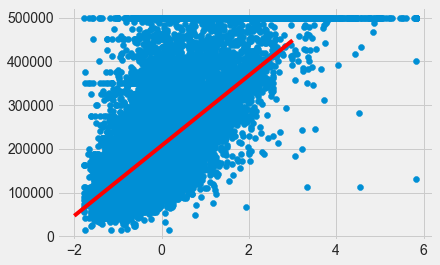

In [40]:
# plotting the linear regression
plt.scatter(X_train_income, y_train_income)

x = np.linspace(-2,3,20)

# Compute the corresponding y values
y = beta_0 + beta_1 * x
plt.plot(x, y, color="red")
plt.show()

In [41]:
# Create a LinearRegression object
model1 = LinearRegression()

# Fit the model using X_train_norm and y_train
model1.fit(df_X_train_norm, df_y_train)

# Print the intercept and coefficient
print("Intercept (Beta 0):", model1.intercept_)
print("Coefficient (Beta 1):", model1.coef_[0])

Intercept (Beta 0): [207300.91235294]
Coefficient (Beta 1): [24798.27614243  8218.05409167 81512.63485241]


## 8. Model Evaluation


Compare the error from models that used only one independent variable vs. the model that used several independent variables. Did we gain anything from including extra independent dimensions?

In [42]:
y_pred_model = model.predict(df_X_test_norm[["median_income"]])
print_evaluate(df_y_test, y_pred_model)

MAE: 62266.41153219215
MSE: 7009935982.6736
RMSE: 83725.36045114168
R2 Square 0.45199761620033374
__________________________________


In [43]:
y_pred_model1 = model1.predict(df_X_test_norm)
print_evaluate(df_y_test, y_pred_model1)

MAE: 59823.957642615256
MSE: 6458174909.396284
RMSE: 80362.77066774319
R2 Square 0.49513158834946436
__________________________________


**FINDINGS:**
* The MAE decreased from 62266.41 to 59823.96, indicating a lower average absolute difference between the predicted and actual values.
* The MSE decreased from 7009935982.67 to 6458174909.40, showing a reduction in the average squared difference between the predicted and actual values.
* The RMSE decreased from 83725.36 to 80362.77, representing a smaller root mean squared error.
* The R2 Square increased from 0.452 to  0.495, suggesting a better fit of the model to the data.

**Therefore, including extra independent variables resulted in lower errors and improved performance compared to using only one independent variable. The improvements are medium in size.**

## 9. Predictions from our Model

Tasks:

1.  Take the test data and plot the predicted vs. true value scatter plot.

2.  Plot the histogram of residual values

3.  Make a scatter plot of residuals depending on the predicted value.

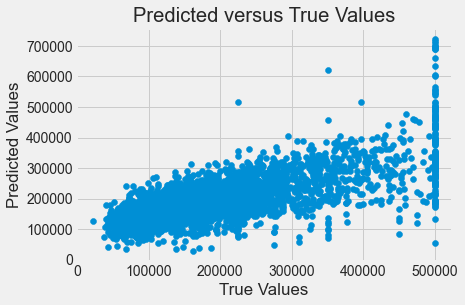

In [44]:
# 1.
plt.scatter(df_y_test, y_pred_model1)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Predicted versus True Values')
plt.show()

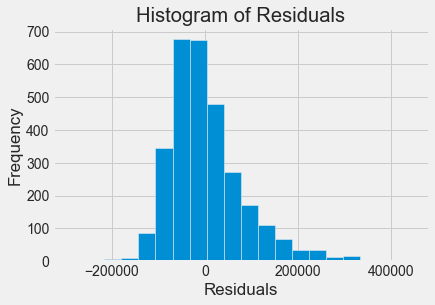

In [45]:
# 2.
residuals = df_y_test - y_pred_model1
plt.hist(residuals, bins=20)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

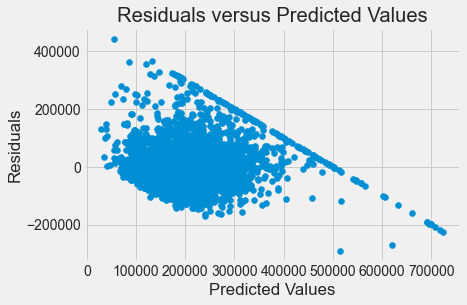

In [46]:
# 3.
plt.scatter(y_pred_model1, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals versus Predicted Values')
plt.show()

## 10. Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

> - **Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:
$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

> - **Mean Squared Error** (MSE) is the mean of the squared errors:
$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

> - **Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:
$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

> 📌 Comparing these metrics:
- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, and is easier to calculate derivations.
- **RMSE** RMSE is more interpretable.

> All of these are **loss functions**,

Tasks:

1.  What is the interpretation of the $R^2$ score?
* **It represents the proportion of the variance in the dependent variable that can be explained by the independent variables in a regression model and is thereby also a evaluation metrics explaining how well the model explains the data**
* **If 0: The model does not explain any of the variance in the dependent variable. It indicates that the independent variables have no relationship with the dependent variable or that the model does not capture any patterns in the data**
* **If 1: The model explains all the variance in the dependent variable. It means that the independent variables perfectly predict the dependent variable, and the model captures all the patterns and relationships in the data.**
* **If between 0 and 1: The model explains a portion of the variance in the dependent variable. The higher the R^2, the better the model fits the data, indicating that a larger proportion of the variance is explained by the independent variables**
2.  Pack these values into a Pandas data frame

In [47]:
# Get the values of the matrices
evaluation_metr_simp_reg= evaluate(df_y_test, y_pred_model) # simple linear regression
evaluation_metr_mul_reg= evaluate(df_y_test, y_pred_model1) # multiple linear regression

data = [evaluation_metr_simp_reg,evaluation_metr_mul_reg ]
columns = ["MAE", "MSE", "RMSE", "R2 squared"]
index = ["Simple linear regression", "Multiple linear regression"]

evaluation_metr = pd.DataFrame(data, index=index, columns=columns)

evaluation_metr

,MAE,MSE,RMSE,R2 squared
Simple linear regression,62266.411532,7.009936e+09,83725.360451,0.451998
Multiple linear regression,59823.957643,6.458175e+09,80362.770668,0.495132


# 11. Polynomial Regression
> Source: [scikit-learn](http://scikit-learn.org/stable/modules/linear_model.html#polynomial-regression-extending-linear-models-with-basis-functions)

***

> One common pattern within machine learning is to use linear models trained on nonlinear functions of the data. This approach maintains the generally fast performance of linear methods, while allowing them to fit a much wider range of data.

> For example, a simple linear regression can be extended by constructing polynomial features from the coefficients. In the standard linear regression case, you might have a model that looks like this for two-dimensional data:

$$\hat{y}(w, x) = w_0 + w_1 x_1 + w_2 x_2$$

> If we want to fit a paraboloid to the data instead of a plane, we can combine the features in second-order polynomials, so that the model looks like this:

$$\hat{y}(w, x) = w_0 + w_1 x_1 + w_2 x_2 + w_3 x_1 x_2 + w_4 x_1^2 + w_5 x_2^2$$

> The (sometimes surprising) observation is that this is still a linear model: to see this, imagine creating a new variable

$$z = [x_1, x_2, x_1 x_2, x_1^2, x_2^2]$$

> With this re-labeling of the data, our problem can be written

$$\hat{y}(w, x) = w_0 + w_1 z_1 + w_2 z_2 + w_3 z_3 + w_4 z_4 + w_5 z_5$$

> We see that the resulting polynomial regression is in the same class of linear models we’d considered above (i.e. the model is linear in w) and can be solved by the same techniques. By considering linear fits within a higher-dimensional space built with these basis functions, the model has the flexibility to fit a much broader range of data.
***

Tasks:

1.  Fit the data to polynomial model of degree 2
2.  Repeat the analysis from the simple regression and show the loss functions
3.  Did polynomoial regression improve the fit? how did you come to that conclusion?
* **The polynomial regression model performs the best among the models. It has the lowest values for MAE, MSE, and RMSE, indicating better accuracy and a smaller average difference between the predicted and actual values. Additionally, it has the highest R2 squared value, indicating a better fit to the data and a higher proportion of the variance explained by the model.**
* **The Simple linear regression has the poorest performance comparing all differnt evaluation metrics and is thus considered the worst model.**
* **Thus, in conclusion the polynominal regression did improve the fit taking all diferent metrics into account.**

In [48]:
# Hint:
from sklearn.preprocessing import PolynomialFeatures

# Create PolynomialFeatures object of degree 2
poly_features = PolynomialFeatures(degree=2)

# Transform the training and test features to polynomial features
df_X_train_poly = poly_features.fit_transform(df_X_train_norm)
df_X_test_poly = poly_features.transform(df_X_test_norm)

# Create a LinearRegression object
model_poly = LinearRegression()
# Fit the model using the polynomial features
model_poly.fit(df_X_train_poly, df_y_train)
# Predict using the polynomial model
y_pred_poly = model_poly.predict(df_X_test_poly)

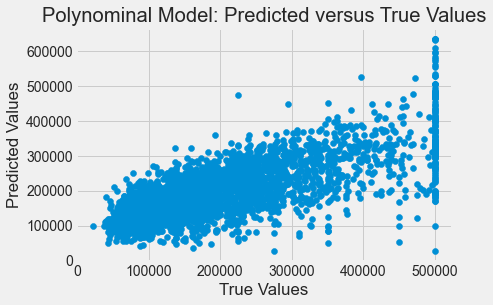

In [49]:
# Predictions from the poly Model
plt.scatter(df_y_test, y_pred_poly)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Polynominal Model: Predicted versus True Values')
plt.show()

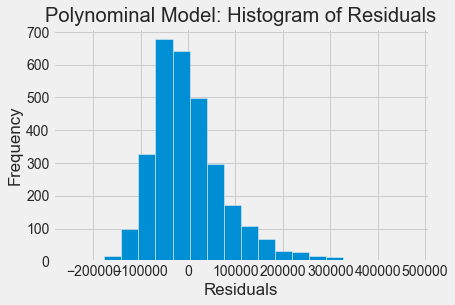

In [50]:
residuals = df_y_test - y_pred_poly
plt.hist(residuals, bins=20)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Polynominal Model: Histogram of Residuals')
plt.show()

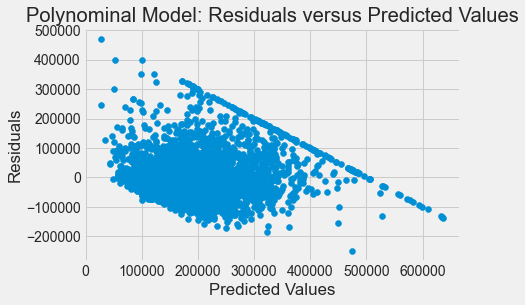

In [51]:
plt.scatter(y_pred_poly, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Polynominal Model: Residuals versus Predicted Values')
plt.show()

In [52]:
# Evaluation Matrices
# Get the values of the matrices
evaluation_metr_simp_reg = evaluate(df_y_test, y_pred_model) # simple linear regression
evaluation_metr_mul_reg = evaluate(df_y_test, y_pred_model1) # multiple linear regression
evaluation_metr_poly_reg = evaluate(df_y_test, y_pred_poly) # polynominal regression

data = [evaluation_metr_simp_reg,evaluation_metr_mul_reg, evaluation_metr_poly_reg ]
columns = ["MAE", "MSE", "RMSE", "R2 squared"]
index = ["Simple linear regression", "Multiple linear regression", "Polynominal regression"]

evaluation_metr = pd.DataFrame(data, index=index, columns=columns)

evaluation_metr

,MAE,MSE,RMSE,R2 squared
Simple linear regression,62266.411532,7.009936e+09,83725.360451,0.451998
Multiple linear regression,59823.957643,6.458175e+09,80362.770668,0.495132
Polynominal regression,58834.644769,6.194682e+09,78706.299474,0.515730
